In [13]:
# Import pandas and numpy
import pandas as pd 
import numpy as np

# Import for splitting data into train & test for the ML models
from sklearn.model_selection import train_test_split

# Import Machine Learning Linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# Import neural network modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler

# Import metrics to calculate accuracy of models
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Read the cleaned country data CSV file
df = pd.read_csv("../Resources/merged_df.csv", encoding ="unicode_escape")
df.head()

,country_name,Year,urbanization,gdp_per_cap,inflation,gdp_current,unemployment,literacy_adult,health_exp,literacy_youth,life_exp,re_consumption,ff_consumption,energy_use
0,Canada,1971,76.090,4520.162878,2.704918,9.927196e+10,6.400000,81.228489,6.204456,88.205112,73.029268,30.497158,84.154154,6436.226256
1,Afghanistan,1971,12.021,166.224831,25.565204,1.831109e+09,8.118803,81.228489,6.204456,88.205112,37.923000,30.497158,65.539705,2326.432009
2,Albania,1971,31.933,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,65.618000,30.497158,74.660703,785.161526
3,Algeria,1971,39.665,359.824582,2.626642,5.077222e+09,8.118803,81.228489,6.204456,88.205112,43.670000,30.497158,98.999816,245.527602
4,American Samoa,1971,70.784,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,66.294149,30.497158,65.539705,2326.432009


In [15]:
# Checking datatypes of each columns
df.dtypes

country_name       object
Year                int64
urbanization      float64
gdp_per_cap       float64
inflation         float64
gdp_current       float64
unemployment      float64
literacy_adult    float64
health_exp        float64
literacy_youth    float64
life_exp          float64
re_consumption    float64
ff_consumption    float64
energy_use        float64
dtype: object

In [16]:
world_df = df.copy()
world_df.head()

,country_name,Year,urbanization,gdp_per_cap,inflation,gdp_current,unemployment,literacy_adult,health_exp,literacy_youth,life_exp,re_consumption,ff_consumption,energy_use
0,Canada,1971,76.090,4520.162878,2.704918,9.927196e+10,6.400000,81.228489,6.204456,88.205112,73.029268,30.497158,84.154154,6436.226256
1,Afghanistan,1971,12.021,166.224831,25.565204,1.831109e+09,8.118803,81.228489,6.204456,88.205112,37.923000,30.497158,65.539705,2326.432009
2,Albania,1971,31.933,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,65.618000,30.497158,74.660703,785.161526
3,Algeria,1971,39.665,359.824582,2.626642,5.077222e+09,8.118803,81.228489,6.204456,88.205112,43.670000,30.497158,98.999816,245.527602
4,American Samoa,1971,70.784,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,66.294149,30.497158,65.539705,2326.432009


### Linear Regression model

In [26]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "Year","country_name"], axis=1)
y = world_df["gdp_current"]

In [27]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Create the linear regression model
lr_model = LinearRegression()

# Fit the model 
lr_model.fit(X_train, y_train)

LinearRegression()

To assess the impact of each features on the target, I am using the coefficients of linear regression model.

In [29]:
# Determine feature coefficients
coefficients = lr_model.coef_

# Sort the coefficients in descending absolute value order
sorted_index = np.abs(coefficients).argsort()[::-1]

# Print the feature names and their coefficients
print("Feature Coefficients:")
for index in sorted_index:
    print("{}: {}".format(X.columns[index], coefficients[index]))

Feature Coefficients:
health_exp: 123219702836.89848
unemployment: -17320213827.93431
life_exp: 6321235994.615167
ff_consumption: 1411202546.2540295
literacy_adult: -1269587561.4147134
literacy_youth: 570092865.4864465
urbanization: -545015775.7981517
re_consumption: -543308667.8966606
inflation: -24598892.24613231
energy_use: 23610089.10411507
gdp_per_cap: 6407561.317415714


In [30]:
# Make predictions on the test data set
y_pred = lr_model.predict(X_test)

# Calculate the accuracy of the model
score = lr_model.score(X_test, y_test)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_test,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Test accuracy: 13.9%
R2 Score: 13.9%


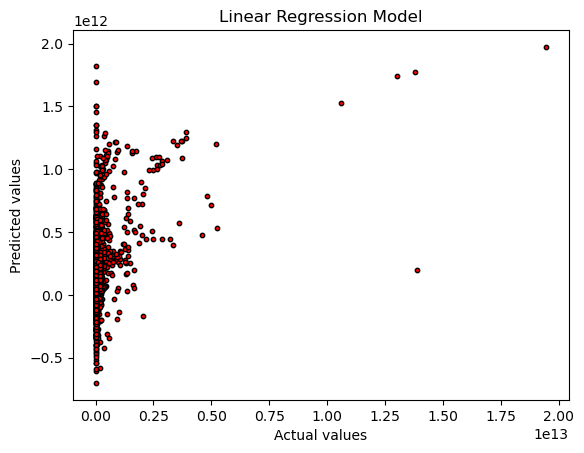

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred, s=10, c='red', edgecolor='black',)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Model')
plt.show()

In [25]:
# Make predictions on the training data set
y_pred = lr_model.predict(X_train)

# Calculate the accuracy of the model
score = lr_model.score(X_train, y_train)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_train,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Test accuracy: 5.78%
R2 Score: 5.78%


### Linear Regression model + scaling on our data

In [5]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year"], axis=1)
y = world_df["gdp_current"]

In [10]:
print("Number of rows in X:", len(X))
print("Number of rows in y:", len(y))

Number of rows in X: 11067
Number of rows in y: 11067


In [6]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the X_test data using scaler object
X_test_scaled = scaler.transform(X_test)

In [8]:
# Create the linear regression model
lr_model_new = LinearRegression()

# Fit the model on scaled data
lr_model_new.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
# Determine feature coefficients
coefficients = lr_model_new.coef_

# Sort the coefficients in descending absolute value order
sorted_index = np.abs(coefficients).argsort()[::-1]

# Print the feature names and their coefficients
print("Feature Coefficients:")
for index in sorted_index:
    print("{}: {}".format(X.columns[index], coefficients[index]))

Feature Coefficients:
health_exp: 228437307160.30676
gdp_per_cap: 121197786021.38681
unemployment: -68450255004.559906
energy_use: 56531067254.72751
life_exp: 55204112306.93537
ff_consumption: 30926022806.315903
literacy_adult: -22193144540.25224
urbanization: -12223573741.264294
re_consumption: -10973545201.248268
literacy_youth: 10901292097.498444
inflation: -869400826.3892261


In [13]:
# Make predictions on the test data set
y_pred_train = lr_model_new.predict(X_train_scaled)

# Calculate the r2_score
r2_score_ = r2_score(y_train, y_pred_train)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

R2 Score: 10.78%


In [12]:
# Make predictions on the test data set
y_pred_test = lr_model_new.predict(X_test_scaled)

# Calculate the accuracy of the model
score = lr_model_new.score(X_test_scaled, y_test)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_test,y_pred_test)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Test accuracy: 4.04%
R2 Score: 4.04%


### Random Forest Regressor model

In [5]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Create the random forest regressor model
rfr_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model
rfr_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [7]:
# Determine feature importances
importances = rfr_model.feature_importances_

# Sort the feature importances in descending order (highest to lowest)
sorted_index = importances.argsort()[::-1]

# Print the feature names and their importances
print("Feature Importances:")
for index in sorted_index:
    print("{}: {}".format(X.columns[index], importances[index]))

Feature Importances:
life_exp: 0.2991793594285801
health_exp: 0.21835868784009546
inflation: 0.14727355769360656
urbanization: 0.11072672095771119
unemployment: 0.06023945727689051
re_consumption: 0.053152532357919315
energy_use: 0.044717083536450736
ff_consumption: 0.042088387404216256
literacy_youth: 0.019098694592505756
literacy_adult: 0.005165518912024114


In [11]:
# Make predictions on the test data set
y_pred = rfr_model.predict(X_test)

print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Calculate the accuracy of the RFR model
score = rfr_model.score(X_test, y_test)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score of RFR model
r2_score_ = r2_score(y_test,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

# Calculating the MSE of RFR model
mse = mean_squared_error(y_test, y_pred)
print("--------------------")
print("Mean Squared Error:", mse)

Evaluation metrics of World's Data (1971-2021)
Test accuracy: 83.22%
R2 Score: 83.22%
--------------------
Mean Squared Error: 9.775532096078348e+22


### Random Forest Regressor + Scaling data

In [21]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the X_test data using scaler object
X_test_scaled = scaler.transform(X_test)

In [23]:
# Create the random forest regressor model
rfr_model_scale = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model
rfr_model_scale.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [24]:
# Determine feature importances
importances = rfr_model_scale.feature_importances_

# Sort the feature importances in descending order (highest to lowest)
sorted_index = importances.argsort()[::-1]

# Print the feature names and their importances
print("Feature Importances:")
for index in sorted_index:
    print("{}: {}".format(X.columns[index], importances[index]))

Feature Importances:
life_exp: 0.3053573530025275
health_exp: 0.23177504482754238
urbanization: 0.10292696980103787
inflation: 0.10291877117905224
unemployment: 0.07667535042872255
re_consumption: 0.05710941777470365
energy_use: 0.05166410029783323
ff_consumption: 0.037704197765033476
Year: 0.02893826535685029
literacy_youth: 0.0026207666817766023
literacy_adult: 0.0023097628849203782


In [25]:
# Make predictions on the test data set
y_pred = rfr_model_scale.predict(X_test_scaled)

# Calculate the accuracy of the RandomForestRegressor model
score = rfr_model_scale.score(X_test_scaled, y_test)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_test,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Test accuracy: 66.13%
R2 Score: 66.13%


### Support Vector Regressor model

In [26]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

In [27]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [29]:
# Create the SVR model
SVR_model = SVR(kernel='linear')

# Fir the model on scaled data
SVR_model.fit(X_train, y_train)

SVR(kernel='linear')

One of the ways to measure feature importances of SVR model is Recursive Feature Elimination (RFE).
RFE selects the most important features recursively and the contribution of each feature to overall accuracy of the model is measured.

In [30]:
from sklearn.feature_selection import RFE

# Use RFE to select the best features
rfe = RFE(SVR_model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Convert the ranking_ attribute to a pandas dataframe
importance_df = pd.DataFrame({"feature": X.columns, "importance": rfe.ranking_})

# Sort the dataframe in descending order of importance
sorted_importance_df = importance_df.sort_values(by="importance", ascending=False)

# Print the sorted feature importances
print("Sorted Feature Importances:")
for index, row in sorted_importance_df.iterrows():
    print("{}: {}".format(row["feature"], row["importance"]))

# Evaluate the model on the test set
test_score = rfe.score(X_test, y_test)

print("Test Score: {}".format(test_score))

Sorted Feature Importances:
Year: 11
inflation: 10
health_exp: 9
unemployment: 8
literacy_adult: 7
literacy_youth: 6
energy_use: 5
re_consumption: 4
ff_consumption: 3
life_exp: 2
urbanization: 1
Test Score: -0.03974845457975884


The test score tells us the accuracy at which rfe was able to predict the most important features during feature selection.

Due to its accuracy being negative, I can conclude that the rfe model was not able to select the most important features. 

In [31]:
# Make predictions
y_pred = SVR_model.predict(X_test)

# Calculate the accuracy of this SVR model
test_accuracy = SVR_model.score(X_test, y_test)
print(f"Test accuracy: {np.round(test_accuracy * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_test,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Test accuracy: -3.97%
R2 Score: -3.97%


kernal = poly

In [32]:
# Create the SVR model
SVR_model_poly = SVR(kernel='poly')

# Fir the model on scaled data
SVR_model_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [33]:
# Make predictions
y_pred = SVR_model_poly.predict(X_test)

# Calculate the accuracy of this SVR model
test_accuracy = SVR_model_poly.score(X_test, y_test)
print(f"Test accuracy: {np.round(test_accuracy * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_test,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Test accuracy: -3.97%
R2 Score: -3.97%


kernal = rbf

In [34]:
# Create the SVR model
SVR_model_poly = SVR(kernel='rbf')

# Fir the model on scaled data
SVR_model_poly.fit(X_train, y_train)

SVR()

In [35]:
# Make predictions
y_pred = SVR_model_poly.predict(X_test)

# Calculate the accuracy of this SVR model
test_accuracy = SVR_model_poly.score(X_train, y_train)
print(f"Test accuracy: {np.round(test_accuracy * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_test,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Test accuracy: -3.77%
R2 Score: -3.97%


Note: Despite changing the kernal function, all three different kernal functions give us the same model accuracy.

Potential reasoning behind negative accuracy value:
- There might still be extreme outliars in target values.

Potential solve for the negative accuracy value:
- Using different evaluation metrics such as instead of using R2 square, and accuracy score of model, we can use MSE (Mean Squared Error) which measure for us the average of squared differences between predicted and actual values. Lower MSE provides more accuracte prediction.

In [36]:
# Calculating the MSE of above SVR model
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 8.622134895569726e+23
